In [77]:
:dep plotters = { version = "0.3.5", default_features = false, features = ["evcxr", "all_series"] }
:dep graphviz-rust = { version = "0.9.0" }
:dep base64 = {version = "0.22.0"}

In [78]:
use plotters::prelude::*;
use plotters::series::LineSeries;

use graphviz_rust::dot_generator::*;
use graphviz_rust::dot_structures::*;
use graphviz_rust::{
    exec_dot,
    cmd::Format,
    printer::{PrinterContext, DotPrinter},
};

use base64::prelude::*;

In [79]:
evcxr_figure((1024, 720), |root| {
    let mut chart = ChartBuilder::on(&root)
        .margin(30)
        .x_label_area_size(30)
        .y_label_area_size(30)
        .build_cartesian_2d(0..3, 0..9)?;
    chart.configure_mesh().draw()?;
    chart.draw_series(LineSeries::new([0, 1, 2, 3].map(|x| (x, 3 * x)), &BLACK))?
        .legend(|(x, y)| PathElement::new(vec![(x, y), (x + 20, y)], &RED));
    chart.configure_series_labels()
        .border_style(&BLACK).draw()?;
    root.present()?;
    Ok(())
})

0
 
 
 
1
 
 
 
2
 
 
 
3
 
 
 
4
 
 
 
5
 
 
 
6
 
 
 
7
 
 
 
8
 
 
 
9
 
 
 
 
0
 
 
 
1
 
 
 
2
 
 
 
3

In [48]:
let mut g = graph!(id!("id");
    node!("nod"),
    edge!(node_id!("a1") => node_id!(esc "a2"))
);

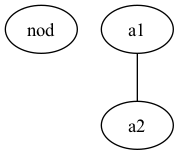

In [63]:

println!("EVCXR_BEGIN_CONTENT image/png");
    let mut child = Command::new("dot")
        .args(&["-Tpng"])
        .stdin(Stdio::piped())
        .stdout(Stdio::piped())
        .spawn()
        .expect("Error running graphviz dot is graphviz installed?");
    child
        .stdin
        .as_mut()
        .unwrap()
        .write_fmt(format_args!("{}", dot))
        .expect("Writing failed.");
    let output = child
        .wait_with_output()
        .expect("Failed to run dot is graphviz installed?");
    println!("{}", base64::encode(&output.stdout[..]));
    println!("EVCXR_END_CONTENT");

Error: failed to resolve: use of undeclared type `Command`

Error: failed to resolve: use of undeclared type `Stdio`

Error: failed to resolve: use of undeclared type `Stdio`

Error: cannot find value `dot` in this scope

Error: use of deprecated function `base64::encode`: Use Engine::encode